In [2]:
import torch, os
import numpy as np
from importlib import reload
if os.path.exists("../notebooks"):
    os.chdir("..")
print("Current directory is", os.getcwd())

Current directory is /home/gibson/sdb2/cola/ass/balls/2019-hackathon-ocr-wymbah


In [3]:
import nets.ctcnet
reload(nets.ctcnet)
from nets.ctcnet import *

import util.beam
reload(util.beam)
from util.beam import BeamSearch

from util.file import FileHolder
fh = FileHolder()

from util.chars import chars, nchars, idx

Using images in ../AI4Good---Meza-OCR-Challenge


In [34]:
ctcmodel = CTCModel().cuda()
checkpoint = torch.load("checkpoint-0049-0.49-CTCModel")
ctcmodel.load_state_dict(checkpoint['model'])
ctcmodel.eval()

def getone():
    inp, outp = fh.get_batch_tensor(1, validation=True)
    log = ctcmodel(inp)
    log = log.detach().cpu().numpy()
    return inp, outp, log

import matplotlib.pyplot as p

def show(inp):
    #print(outp[0])
    p.imshow((inp * 0.2 + 0.9).squeeze(0).permute(1, 2, 0))
    p.show()

In [35]:
def beam(log, nbeams):
    beas = BeamSearch(nbeams)
    for j in range(log.shape[1]):
        beas.add_logit(log[0, j, :])
    return beas.topbeams()

In [52]:
SUFFIX = ["th", "st", "nd", "rd"] + ["th"] * 6
def th(j):
    suffix = SUFFIX[j % 10]
    if 11 <= j < 19:
        suffix = "th"
    return "%d%s" % (j, suffix)

def test(m):
    def fn(j):
        inp, outp, log = getone()
        answer = beam(log, 8)
        if answer[0].str() != outp[0]:
            print("%s image was wrong!" % th(j))
            print("answer", answer[0].str())
            print("correct:", outp)
            print("top 3 guesses:", [z.str() for z in answer[:3]])
            print("image:")
            show(inp)
            return 0
        else:
            return 1
    count = sum(fn(j) for j in range(m)) / m
    return count

8th image was wrong!
answer 19.5
correct: ['195']
top 3 guesses: ['19.5', '19,5', '195']
image:


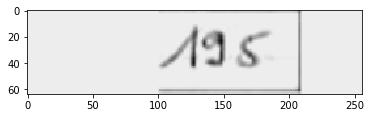

10th image was wrong!
answer 98
correct: ['88']
top 3 guesses: ['98', '78', '88']
image:


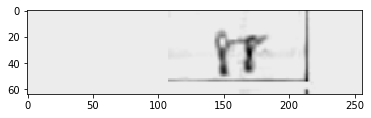

11th image was wrong!
answer 137.33
correct: ['137.93']
top 3 guesses: ['137.33', '137.93', '137.333']
image:


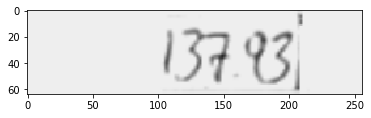

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15th image was wrong!
answer 12.5
correct: ['125']
top 3 guesses: ['12.5', '12,5', '12.6']
image:


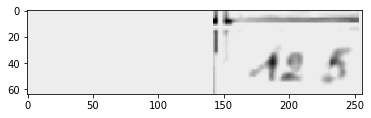

22nd image was wrong!
answer -12.01
correct: ['-12.011']
top 3 guesses: ['-12.01', '-12.011', '-112.01']
image:


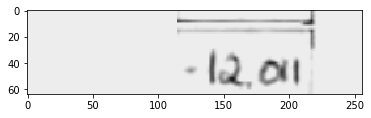

45th image was wrong!
answer 134
correct: ['130']
top 3 guesses: ['134', '132', '131']
image:


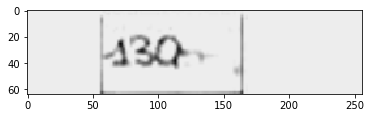

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


47th image was wrong!
answer 20,0
correct: ['20,5']
top 3 guesses: ['20,0', '20,6', '20,5']
image:


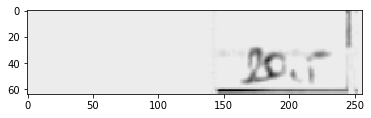

53rd image was wrong!
answer -140.5
correct: ['-170.5']
top 3 guesses: ['-140.5', '-190.5', '-170.5']
image:


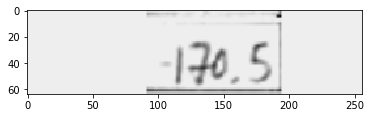

62nd image was wrong!
answer 98
correct: ['9,8']
top 3 guesses: ['98', '9.8', '978']
image:


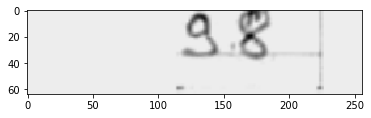

75th image was wrong!
answer 13
correct: ['18']
top 3 guesses: ['13', '18', '15']
image:


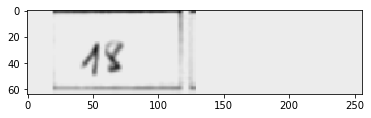

79th image was wrong!
answer 77
correct: ['7.7']
top 3 guesses: ['77', '7.7', '7,7']
image:


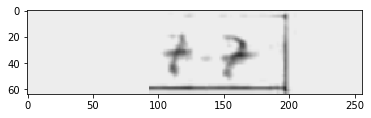

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


81st image was wrong!
answer 117
correct: ['11.7']
top 3 guesses: ['117', '11.7', '11,7']
image:


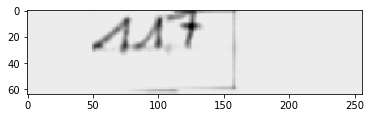

104th image was wrong!
answer -74.73
correct: ['74.73']
top 3 guesses: ['-74.73', '74.73', '174.73']
image:


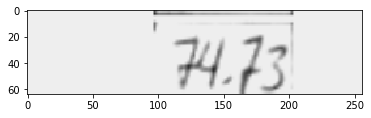

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


114th image was wrong!
answer 8,4
correct: ['8.4']
top 3 guesses: ['8,4', '8,1', '84']
image:


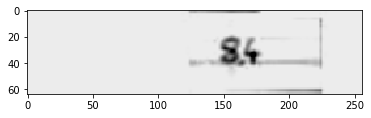

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


138th image was wrong!
answer 14,4
correct: ['10,4']
top 3 guesses: ['14,4', '12,4', '10,4']
image:


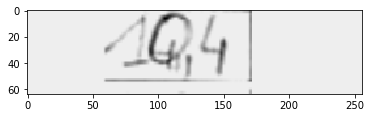

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


149th image was wrong!
answer 15.8
correct: ['15.3']
top 3 guesses: ['15.8', '15.9', '15.7']
image:


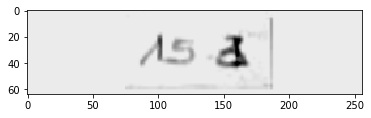

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


171st image was wrong!
answer 14,4
correct: ['10,4']
top 3 guesses: ['14,4', '10,4', '12,4']
image:


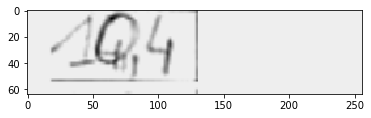

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


179th image was wrong!
answer 79
correct: ['72']
top 3 guesses: ['79', '72', '77']
image:


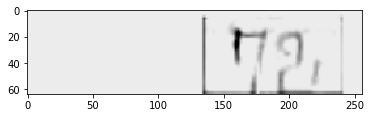

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


182nd image was wrong!
answer 86
correct: ['66']
top 3 guesses: ['86', '66', '56']
image:


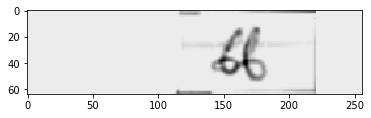

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


183rd image was wrong!
answer 7,600
correct: ['7.600']
top 3 guesses: ['7,600', '7,6600', '7.600']
image:


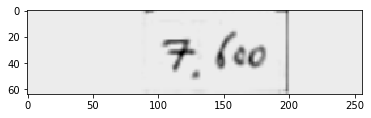

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


186th image was wrong!
answer 6,300
correct: ['6.300']
top 3 guesses: ['6,300', '6,3200', '6,2300']
image:


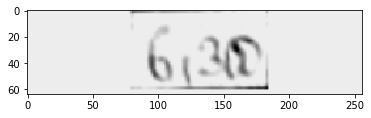

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


200th image was wrong!
answer 120
correct: ['1,20']
top 3 guesses: ['120', '1.20', '1,20']
image:


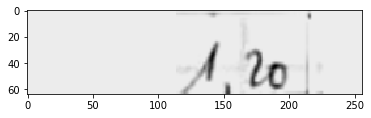

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


230th image was wrong!
answer 12.5
correct: ['125']
top 3 guesses: ['12.5', '12,5', '125']
image:


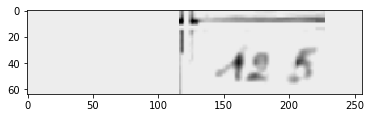

232nd image was wrong!
answer 137.933
correct: ['137.93']
top 3 guesses: ['137.933', '137.33', '137.93']
image:


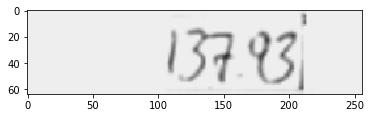

239th image was wrong!
answer 12900
correct: ['12300']
top 3 guesses: ['12900', '122900', '12200']
image:


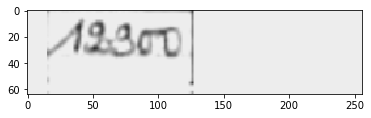

241st image was wrong!
answer 38
correct: ['98']
top 3 guesses: ['38', '938', '88']
image:


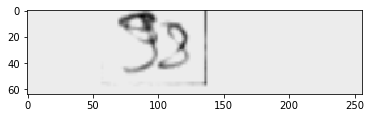

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


244th image was wrong!
answer 2.5
correct: ['225']
top 3 guesses: ['2.5', '295', '285']
image:


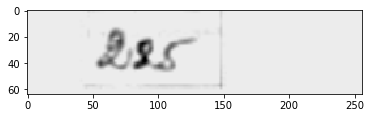

254th image was wrong!
answer 60
correct: ['68']
top 3 guesses: ['60', '69', '68']
image:


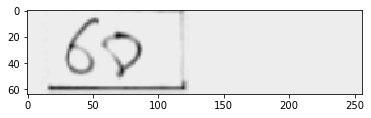

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


280th image was wrong!
answer 104.533
correct: ['104.53']
top 3 guesses: ['104.533', '104.33', '104.5533']
image:


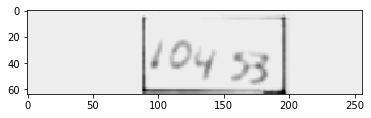

288th image was wrong!
answer 15
correct: ['1.5']
top 3 guesses: ['15', '13', '115']
image:


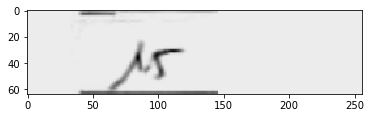

309th image was wrong!
answer 5,600
correct: ['5600']
top 3 guesses: ['5,600', '5.600', '5600']
image:


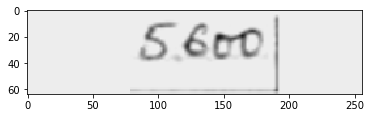

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


312nd image was wrong!
answer 13.6
correct: ['136']
top 3 guesses: ['13.6', '136', '13,6']
image:


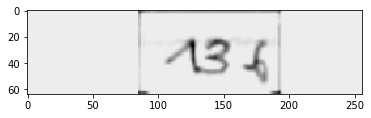

319th image was wrong!
answer -74.73
correct: ['74.73']
top 3 guesses: ['-74.73', '74.73', '-174.73']
image:


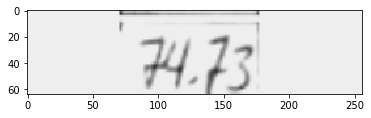

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


331st image was wrong!
answer 13.9
correct: ['13,9']
top 3 guesses: ['13.9', '13,9', '13.8']
image:


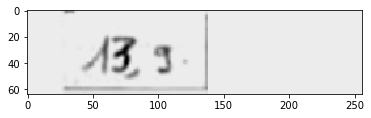

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


333rd image was wrong!
answer 20,6
correct: ['20,5']
top 3 guesses: ['20,6', '20,5', '20,0']
image:


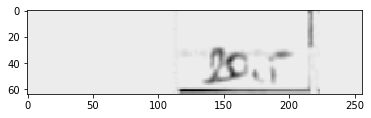

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [ ]:
count = test(1000)

In [ ]:
print("Total correct: %.2f%% (%d/%d)" % (count * 100, count, 1000))